## 8.2 텍스트 사전 준비 작업 (텍스트 정규화)

In [1]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


#### 문장 토큰화
- 문장 마침표, 개행문자(\n) 등 마지막을 뜻하는 기호에 따라 분리하는 방식이 일반적
- snet_tokenize()함수 이용

In [ ]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

#### 단어 토큰화
- 문장을 단어로 토큰화
- 정규표현식을 이용해 다양한 유형으로 토큰화 가능 (공백, 개행문자 뿐만 아니라)

In [ ]:
from nltk import word_tokenize, sent_tokenize

#여러개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text):
    
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#여러 문장들에 대해 문장별 단어 토큰화 수행. 
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

#### n-gram이란
- 문장을 단어별로 하나씩 토큰화 -> 문맥적 의미 무시
- 따라서 n개의 단어를 하나의 토큰화 단위로 분리하는 방식 채택
- 예시 (the, apple), (apple, is) 등 

### 스톱 워드 제거
- 분석에 큰 의미가 없는 단어 제거
- NLTK 라이브러리에 언어별로 목록 제공
- stopwords 목록 다운받으면됨

In [ ]:
# Stopwords 제거
import nltk
nltk.download('stopwords')

In [ ]:
print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

In [ ]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제의 3개의 문장별로 얻은 word_tokens list 에 대해 stop word 제거 Loop
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        #소문자로 모두 변환합니다. 
        word = word.lower()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

#### 위 word_tokens 리스트에서 stopwords 필터링

### Stemming과 Lemmatization

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

#### 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것
#### Lemmatization이 Stemming보다 정교하며 의미론적인 기반에서 단어의 원형 찾음
- Stemming: 원형 단어로 변환 시 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향
- Lemmatization: 품사와 같은 문범적 요소와 의미적 부분을 감안해 정확한 철자로 된 어근단어를 찾음

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

##### Lemmatization 수행 시 품사를 지정해줘야 함

### Bag of Words - BOW

- 문서가 가지는 모든 단어의 문맥, 순서를 무시하고 일괄적으로 단어에 대한 빈도값을 부여해 피처값 추출

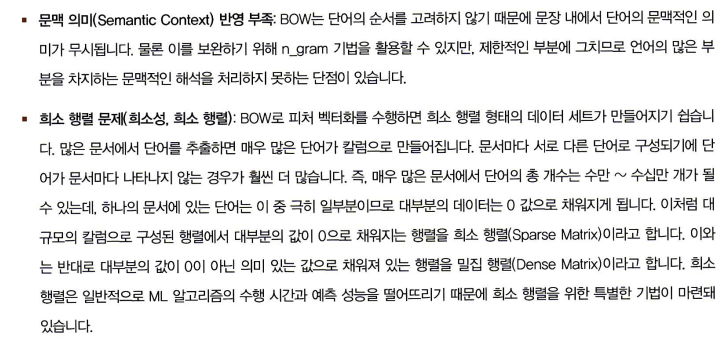

#### 피쳐 벡터화
- 파이썬에 텍스트를 그대로 두는 것이 아닌 의미있는 피쳐로 넘겨야함

#### 카운트 기반 벡터화, TF-IDF
- 카운트 기반 벡터화: 각 문서에서 해당 단어가 나타나는 횟수
- TF-IDF: 개별 문서에 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에 자주 나타나는 단어에는 페널티를 줌

#### 피쳐 벡터화를 사이킷런에서 구현하는 방법
- CountVectorizer과 TfidfVectorizer

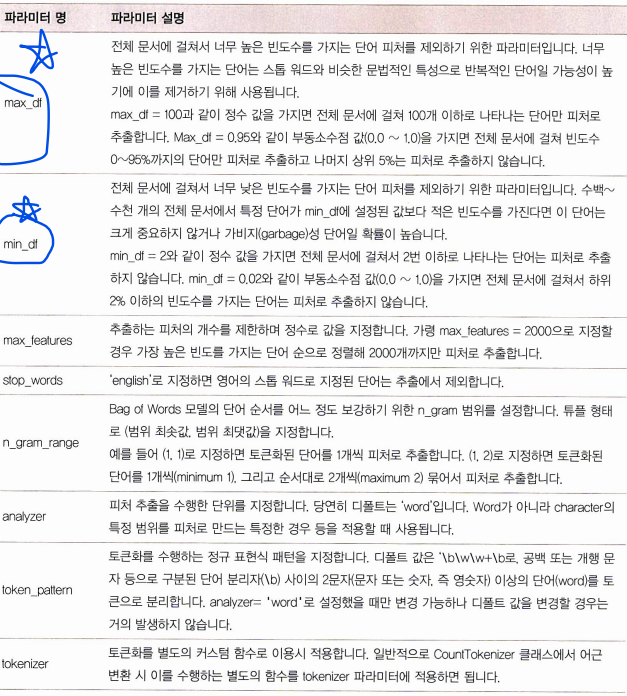

#### CountVectrorizer 기반 벡터화 솔루션
##### 1. 영어일 때 대소문자 전처리
##### 2. 디폴트로 단어 기준으로 n_gram_range 반영해 각 단어 토큰화
##### 3. 텍스트 정규화 (stop_words 필터링)
##### 4. 파라미터를 반영해 토큰화된 단어를 feature extraction 후, vectorization 적용

In [ ]:
#

### BOW 벡터화를 위한 희소행렬
- 벡터화 변환 후, 필연적으로 많은 희소행렬 존재할 것임 -> 메모리 공간 소모 큼 -> 희소행렬을 물리적으로 적은 메모리 공간을 차지하도록 변환하는 방식
##### (1) COO 형식: 0이 아닌 데이터만 별도의 배열에 저장
##### (2) CSR 형식: COO 형식이 행, 열 위치를 나타내기 위해 반복적인 위치 데이터 사용 문제를 완화

In [ ]:
# 희소 행렬 - COO 형식

import numpy as np
dense = np.array( [ [ 3, 0, 1 ], [0, 2, 0 ] ] )

from scipy import sparse

# 0 이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

In [ ]:

from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

In [ ]:
dense3 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

##### CountVectorizer, TfidfVectorizer 클래스 모두 csr형태의 희소행렬

### 8.4. 텍스트 분류 실습 -20 뉴스그룹 분류

##### 1. 텍스트 정규화

In [ ]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all',random_state=156)

In [ ]:
print(news_data.keys())


In [ ]:
import pandas as pd

print('target 클래스의 값과 분포도 \n',pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n',news_data.target_names)

In [ ]:
print(news_data.data[0])
# 갭ㄹ 데이터가 텍스트로 어떤 구성인지 확인하기 위해

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용(Train) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news= fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target
print(type(X_train))

# subset='test'으로 테스트(Test) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news= fetch_20newsgroups(subset='test',remove=('headers', 'footers','quotes'),random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0} , 테스트 데이터 크기 {1}'.format(len(train_news.data) , len(test_news.data)))


#### 2. 피처 벡터화 변환, 예측

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 feature extraction 변환 수행. 
cnt_vect = CountVectorizer()

cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit( )된 CountVectorizer를 이용하여 테스트 데이터를 feature extraction 변환 수행. 
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 Text의 CountVectorizer Shape:',X_train_cnt_vect.shape)

# 주의사항: CountVectorizer.fit_transform을 테스트 세트에도 적용하면 테스트 데이터 기반으로 CounterVectorizer가 fit을 수행해
# 학습 시 사용된 피처 개수와 예측 시 사용된 피처 개수가 달라짐

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_cnt_vect , y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환. 
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

In [ ]:
# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경하여 Feature Vectorization 적용.
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300 )
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

In [ ]:
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행. CV는 3 Fold셋으로 설정. 
params = { 'C':[0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf ,param_grid=params , cv=3 , scoring='accuracy' , verbose=1 )
grid_cv_lr.fit(X_train_tfidf_vect , y_train)
print('Logistic Regression best C parameter :',grid_cv_lr.best_params_ )

# 최적 C 값으로 학습된 grid_cv로 예측 수행하고 정확도 평가. 
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

#### 3. 파이프라인을 사용해 그리드서치

In [ ]:
from sklearn.pipeline import Pipeline

# TfidfVectorizer 객체를 tfidf_vect 객체명으로, LogisticRegression객체를 lr_clf 객체명으로 생성하는 Pipeline생성
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))
])

# 별도의 TfidfVectorizer객체의 fit_transform( )과 LogisticRegression의 fit(), predict( )가 필요 없음. 
# pipeline의 fit( ) 과 predict( ) 만으로 한꺼번에 Feature Vectorization과 ML 학습/예측이 가능. 
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

In [ ]:
# 그리드서치에 파이프라인을 입력하면서 TF-IDF의 파라미터와 로지스틱의 파라미터를 함께 최적화
# 단점: 오래걸림

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression(solver='liblinear'))
])

# Pipeline에 기술된 각각의 객체 변수에 언더바(_)2개를 연달아 붙여 GridSearchCV에 사용될 
# 파라미터/하이퍼 파라미터 이름과 값을 설정. . 
params = { 'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
           'tfidf_vect__max_df': [100, 300, 700],
           'lr_clf__C': [1, 5, 10]
}

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_pipe.fit(X_train , y_train)
print(grid_cv_pipe.best_params_ , grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))